# The Normal Equation

In [2]:
import numpy as np
X = 2* np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [8]:
X_b = np.c_[np.ones((100,1)), X]

In [12]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [14]:
theta_best

array([[4.13585996],
       [3.09321727]])

In [18]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.13585996],
       [10.32229451]])

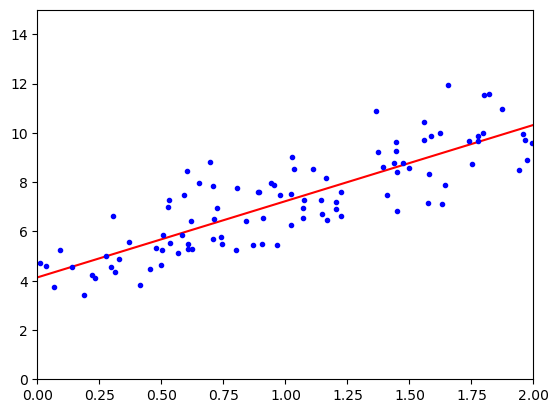

In [22]:
from matplotlib import pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Computation Complexity

## Gradient Descent

In [30]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients
theta

array([[4.13585996],
       [3.09321727]])

## Stochastic Gradient Descent

In [33]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i )
        theta = theta - eta * gradients

In [35]:
theta

array([[4.10611546],
       [3.14678155]])